## Machine Learning

In [1]:
# Import libraries to be used in the task
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score

# Ignore warnings - warning were used in the development of the notebook, and removed in the final version
import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Load the dataset to be analysed
unfinished_construction_population_df = pd.read_csv('unfinished_construction_population_df.csv')
unfinished_construction_population_df.info()
unfinished_construction_population_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Department Ref Number        420 non-null    int64 
 1   Construction Activity (Y/N)  420 non-null    object
 2   County                       420 non-null    object
 3   Detached Units               420 non-null    int64 
 4   Semi-detached Units          420 non-null    int64 
 5   Terraced Units               420 non-null    int64 
 6   Apartment Units              420 non-null    int64 
 7   Duplex Units                 420 non-null    int64 
 8   Total All Units              420 non-null    int64 
 9   Occupied Houses              420 non-null    int64 
 10  Vacant Houses                420 non-null    int64 
 11  No Start Houses              420 non-null    int64 
 12  Occupied Apartments          420 non-null    int64 
 13  Vacant Apartments            420 no

(420, 17)

In [3]:
#save independent values in X and dependent in y
X = unfinished_construction_population_df[['Total All Units']]
y = unfinished_construction_population_df[['Occupied Houses']]

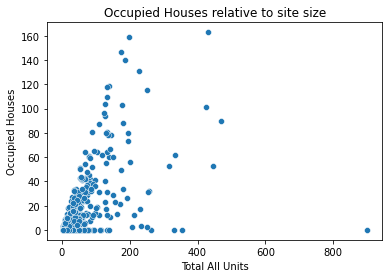

In [4]:
#sns.scatterplot(x=unfinished_construction_population_ml_df['Detached Units'], y=unfinished_construction_population_ml_df['Semi-detached Units'], hue=unfinished_construction_population_ml_df['Occupied Houses'] )

sns.scatterplot(x=unfinished_construction_population_df['Total All Units'], y=unfinished_construction_population_df['Occupied Houses'])
#sns.scatterplot(x=unfinished_units_county_df['Occupied Apartments'], y=unfinished_units_county_df['Total All Units'])

plt.title("Occupied Houses relative to site size")
plt.savefig("occupied_houses_per_site.jpg", dpi=300, transparent = True, bbox_inches = 'tight', pad_inches=0.3)

In [5]:
#create the regression model object and fit the data into it
reg_houses = linear_model.LinearRegression()

reg_houses.fit(X,y)

LinearRegression()

In [6]:
#predict the speed at 20:00 hours in the evening and with 750 users online
predicted_speed = reg_houses.predict([[200]])
print("Predicted Speed : ")
print(predicted_speed)


Predicted Speed : 
[[41.70586456]]


In [7]:
# Call the split the data and the default splitting is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

In [8]:
# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.25
Test set score: 0.26


## Analysis per county

In [9]:
# Load the dataset to be analysed
unfinished_units_county_df = pd.read_csv('unfinished_units_county_df.csv')
unfinished_units_county_df.info()
unfinished_units_county_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             26 non-null     int64 
 1   County                 26 non-null     object
 2   Department Ref Number  26 non-null     int64 
 3   Detached Units         26 non-null     int64 
 4   Semi-detached Units    26 non-null     int64 
 5   Terraced Units         26 non-null     int64 
 6   Apartment Units        26 non-null     int64 
 7   Duplex Units           26 non-null     int64 
 8   Total All Units        26 non-null     int64 
 9   Occupied Houses        26 non-null     int64 
 10  Vacant Houses          26 non-null     int64 
 11  No Start Houses        26 non-null     int64 
 12  Occupied Apartments    26 non-null     int64 
 13  Vacant Apartments      26 non-null     int64 
 14  No Start Apartments    26 non-null     int64 
 15  County Population      26

(26, 16)

In [10]:
#unfinished_construction_population_ml_df = unfinished_construction_population_df.replace('Yes', 1)
#unfinished_construction_population_ml_df = unfinished_construction_population_ml_df.replace('No', 0)
#unfinished_construction_population_ml_df.head()


In [29]:
#save independent values in X and dependent in y
X = unfinished_units_county_df[['Total All Units']]
y = unfinished_units_county_df[['Occupied Houses']]

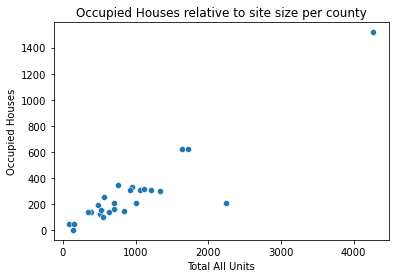

In [30]:
#sns.scatterplot(x=unfinished_construction_population_ml_df['Detached Units'], y=unfinished_construction_population_ml_df['Semi-detached Units'], hue=unfinished_construction_population_ml_df['Occupied Houses'] )

sns.scatterplot(x=unfinished_units_county_df['Total All Units'], y=unfinished_units_county_df['Occupied Houses'])
#sns.scatterplot(x=unfinished_units_county_df['Occupied Apartments'], y=unfinished_units_county_df['Total All Units'])

plt.title("Occupied Houses relative to site size per county")
plt.savefig("occupied_houses_per_site_county.jpg", dpi=300, transparent = True, bbox_inches = 'tight', pad_inches=0.3)

In [31]:
#sns.scatterplot(x=unfinished_units_county_df['Total All Units'], y=unfinished_units_county_df['Occupied Apartments'])

In [32]:
#create the regression model object and fit the data into it
reg_houses = linear_model.LinearRegression()

reg_houses.fit(X,y)

LinearRegression()

In [36]:
#predict the speed at 20:00 hours in the evening and with 750 users online

n_units = [100, 500, 1000, 1500, 2000]

for i in n_units:
    predicted_occupied_units = reg_houses.predict([[i]])
    print(f"Number of units: {i}\nNumber of occupied units: {predicted_occupied_units}")


Number of units: 100
Number of occupied units: [[7.9934503]]
Number of units: 500
Number of occupied units: [[134.20914447]]
Number of units: 1000
Number of occupied units: [[291.97876219]]
Number of units: 1500
Number of occupied units: [[449.7483799]]
Number of units: 2000
Number of occupied units: [[607.51799762]]


In [37]:
# Call the split the data and the default splitting is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

In [39]:
# Display the coefficient and intercept values
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[0.32195595]]
lr.intercept_: [-38.20257102]


In [40]:
# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.82
Test set score: 0.77


In [41]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.77


In [42]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 1000000).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.84


In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.82
Test set score: 0.77
Number of features used: 1


In [45]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=.00000001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.82
Test set score: 0.77
Number of features used: 1


In [46]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.82
Test set score: 0.77
Number of features used: 1


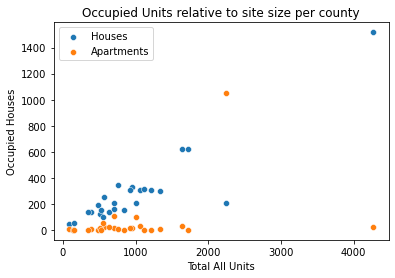

In [28]:
sns.scatterplot(x=unfinished_units_county_df['Total All Units'], y=unfinished_units_county_df['Occupied Houses'], label = "Houses")
sns.scatterplot(x=unfinished_units_county_df['Total All Units'], y=unfinished_units_county_df['Occupied Apartments'], label = "Apartments")

plt.title("Occupied Units relative to site size per county")
plt.savefig("occupied_units_per_site_county.jpg", dpi=300, transparent = True, bbox_inches = 'tight', pad_inches=0.3)